In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [111]:
df = pd.read_csv('Titanic.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Columns Description
- Survived : Whether the person survided the titanic accident
- Pcalss   : CLass of the passenger in which they travelled
- Sex      : Sex of the Passenger
- SibSp    : No of siblings or spouse passenger had
- Parch    : Passenger had parent or child
- Embarked : To which city the passenger was going

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [112]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [113]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [10]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [114]:
# Since S is the most passenger's destination

df['Embarked'].fillna('S', inplace=True)

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [115]:
df.drop('Cabin', axis=1, inplace=True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.000000,0,0,343120,7.6500,S
454,455,0,3,"Peduzzi, Mr. Joseph",male,29.699118,0,0,A/5 2817,8.0500,S
191,192,0,2,"Carbines, Mr. William",male,19.000000,0,0,28424,13.0000,S
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.000000,1,1,11751,52.5542,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,C


Out of 891 passengers 41.76  percent passenger didnt survived


<AxesSubplot:xlabel='Survived', ylabel='count'>

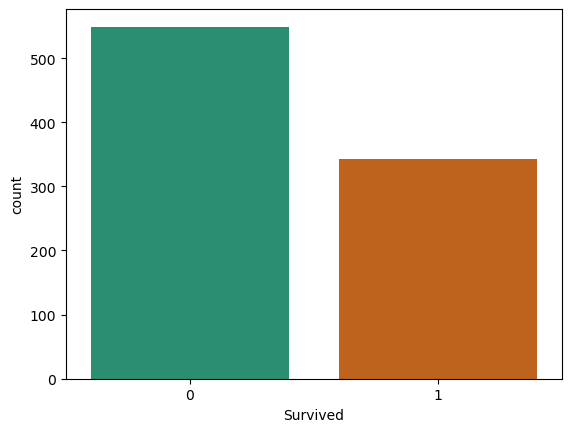

In [26]:
print('Out of 891 passengers', np.round((len(df[df['Survived'] == 1])/819)*100,2),' percent passenger didnt survived')

sns.countplot(x='Survived', data=df, palette='Dark2')

# Passenger Count

No of passenger in different classes
3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

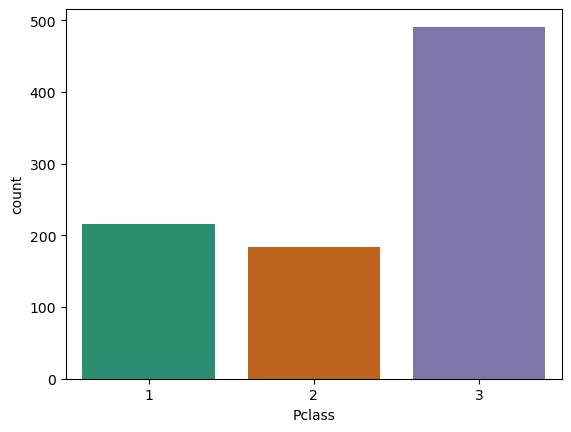

In [31]:
print('No of passenger in different classes')
print(df['Pclass'].value_counts())
sns.countplot(x='Pclass', data=df, palette='Dark2')

# Sex Count

male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

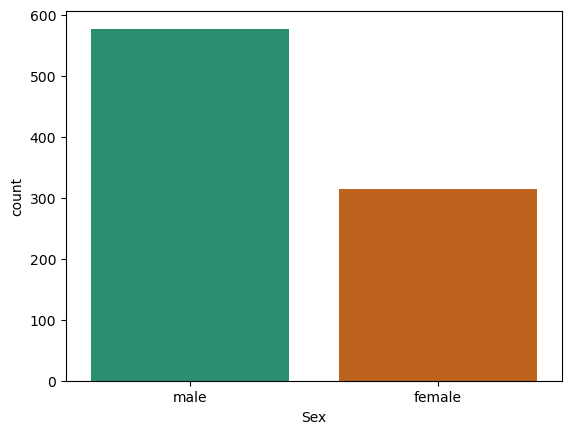

In [32]:
print(df['Sex'].value_counts())
sns.countplot(x='Sex', data=df, palette='Dark2')

# SibSP Count

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64


<AxesSubplot:xlabel='SibSp', ylabel='count'>

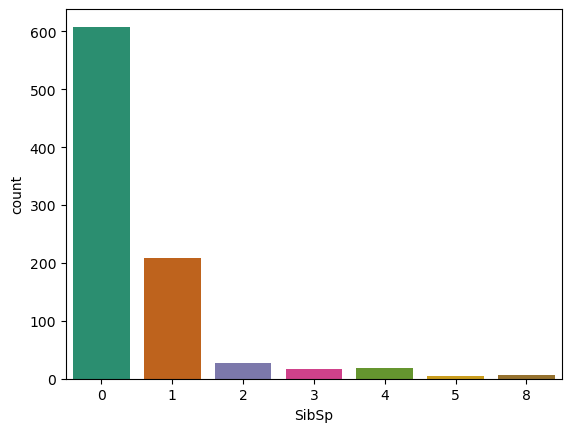

In [35]:
print((df['SibSp'].value_counts()/891)*100)
sns.countplot(x='SibSp', data=df, palette='Dark2')

# Embarked Count

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

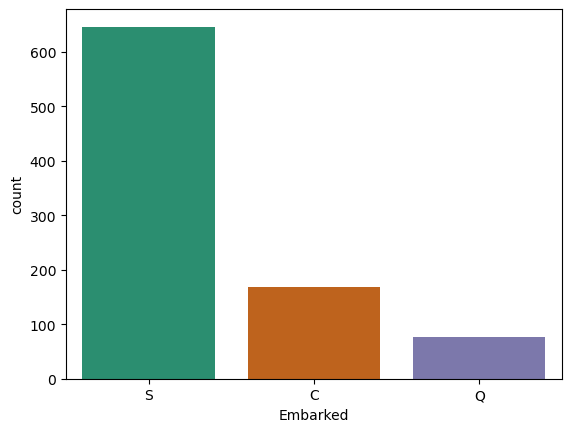

In [36]:
print((df['Embarked'].value_counts()/891)*100)
sns.countplot(x='Embarked', data=df, palette='Dark2')

# Age count

/home/adarsh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

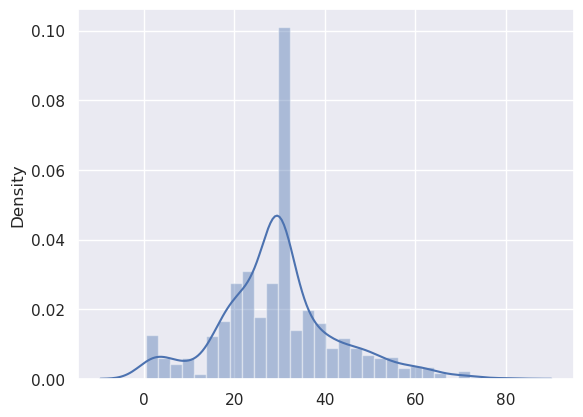

In [43]:
sns.distplot(x=df['Age'])

- Almost a Normal Distribution

<AxesSubplot:xlabel='Age'>

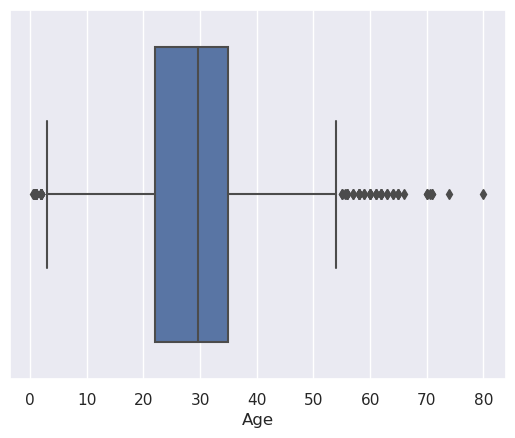

In [45]:
sns.boxplot(x='Age', data=df)

In [53]:
print('People between the age of 55 & 65: ', len(df[(df['Age'] >= 55) & (df['Age'] <=65)]),'Passengers')
print('People between the age of 65 & 75: ', len(df[(df['Age'] >= 65) & (df['Age'] <=75)]),'Passengers')
print('People between the age greater than 75: ', len(df[(df['Age'] >= 75)]),'Passengers')

print('-'*60)
print('People between the age of 0 & 1: ', len(df[(df['Age'] < 1)]),'Passengers')

People between the age of 55 & 65:  34 Passengers
People between the age of 65 & 75:  10 Passengers
People between the age greater than 75:  1 Passengers
------------------------------------------------------------
People between the age of 0 & 1:  7 Passengers


In [116]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Parch Count

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


<AxesSubplot:xlabel='Parch', ylabel='count'>

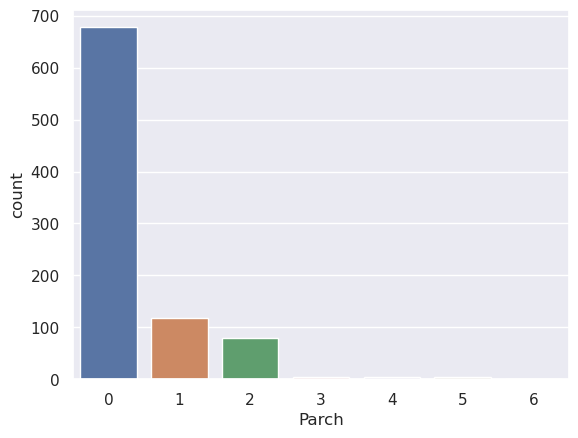

In [117]:
print((df['Parch'].value_counts()/891)*100)

sns.countplot(x='Parch', data=df)

# Fare Analysis

/home/adarsh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

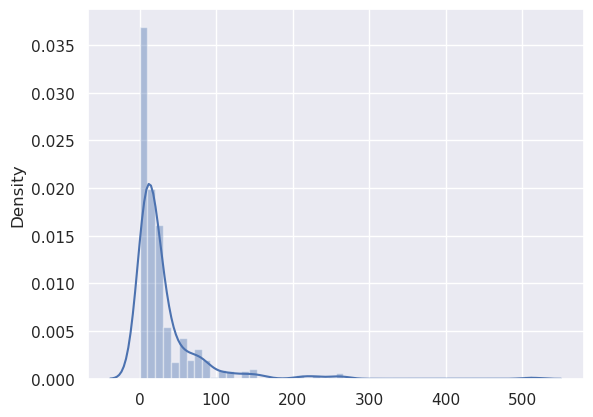

In [62]:
sns.distplot(x=df['Fare'])

<AxesSubplot:xlabel='Fare'>

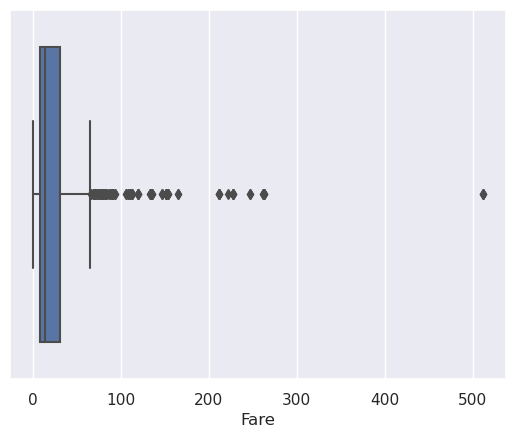

In [63]:
sns.boxplot(x='Fare', data=df)

In [65]:
print('PAssengers having Fare between 100 to 200: ',len(df[(df['Fare']>100) & (df['Fare'] < 200)]))
print('PAssengers having Fare between 200 to 300: ',len(df[(df['Fare']>200) & (df['Fare'] < 300)]))
print('PAssengers having Fare more than 300: ',len(df[(df['Fare']>300)]))

PAssengers having Fare between 100 to 200:  33
PAssengers having Fare between 200 to 300:  17
PAssengers having Fare more than 300:  3


- Fare Data is Normally Distributed
- A lot of passengers had cheap tickets

# Multivariate Analysis

Survived,0,1
Sex,,
female,25.80,74.20
male,81.11,18.89


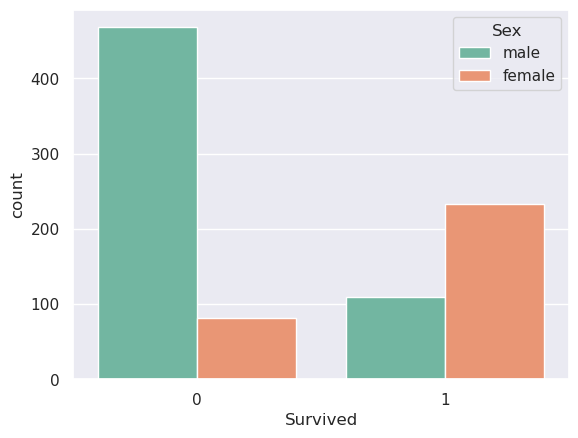

In [73]:
#Survived with Sex

sns.countplot(x='Survived', data=df, palette='Set2', hue='Sex')

pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: np.round((r/r.sum())*100,2), axis=1)

Survived,0,1
Pclass,,
1,37.04,62.96
2,52.72,47.28
3,75.76,24.24


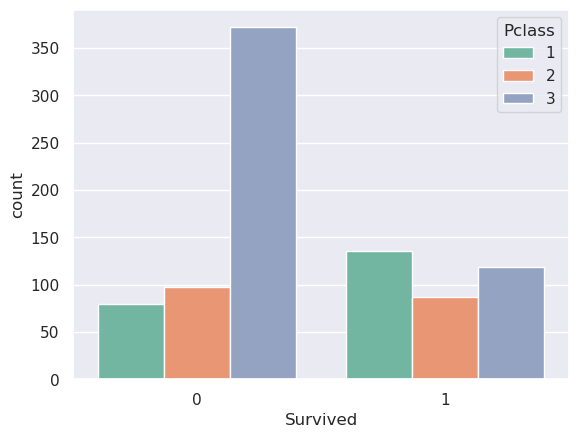

In [74]:
#Survived with Pclass

sns.countplot(x='Survived', data=df, palette='Set2', hue='Pclass')

pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: np.round((r/r.sum())*100,2), axis=1)

In [75]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Survived,0,1
Embarked,,
C,44.64,55.36
Q,61.04,38.96
S,66.10,33.90


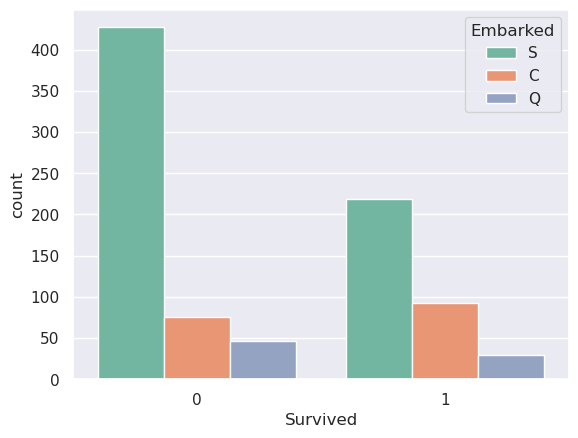

In [76]:
#Survived with Embarked

sns.countplot(x='Survived', data=df, palette='Set2', hue='Embarked')

pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: np.round((r/r.sum())*100,2), axis=1)

/home/adarsh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/adarsh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

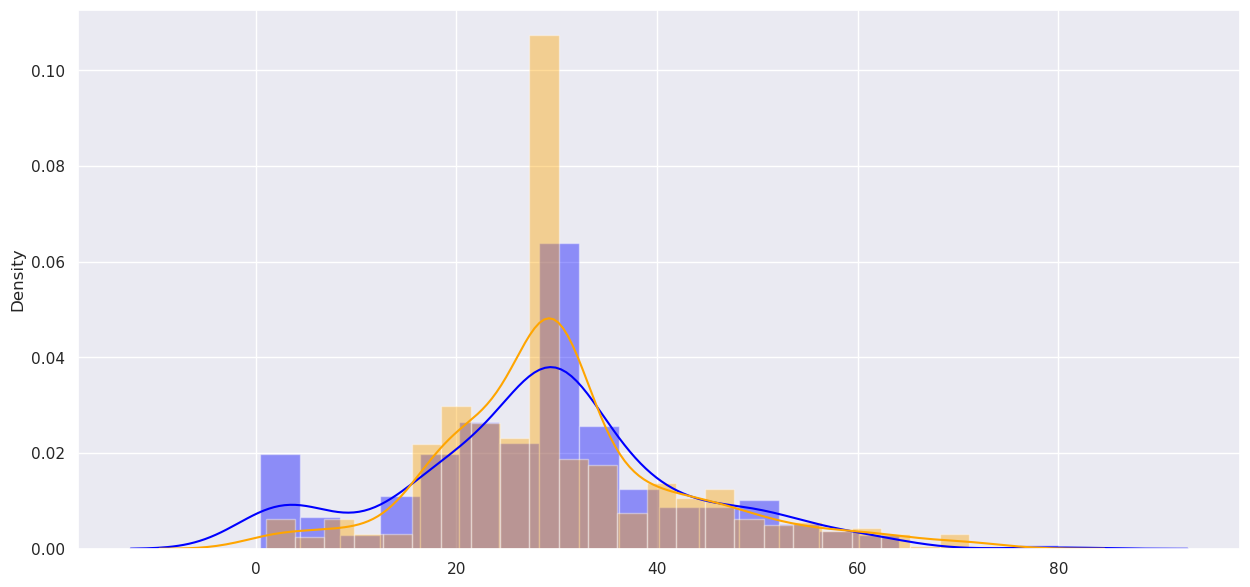

In [84]:
#Survived with Age

plt.figure(figsize=(15,7))
sns.distplot(x= df[df['Survived']==1]['Age'], color='blue')
sns.distplot(x= df[df['Survived']==0]['Age'], color='orange')

- AS we can see the trend in blue line i.e. survived its up for the age group between 0-10
- Between age 20-40 the trend is decreasing i.e. this group people mostly didn't survived

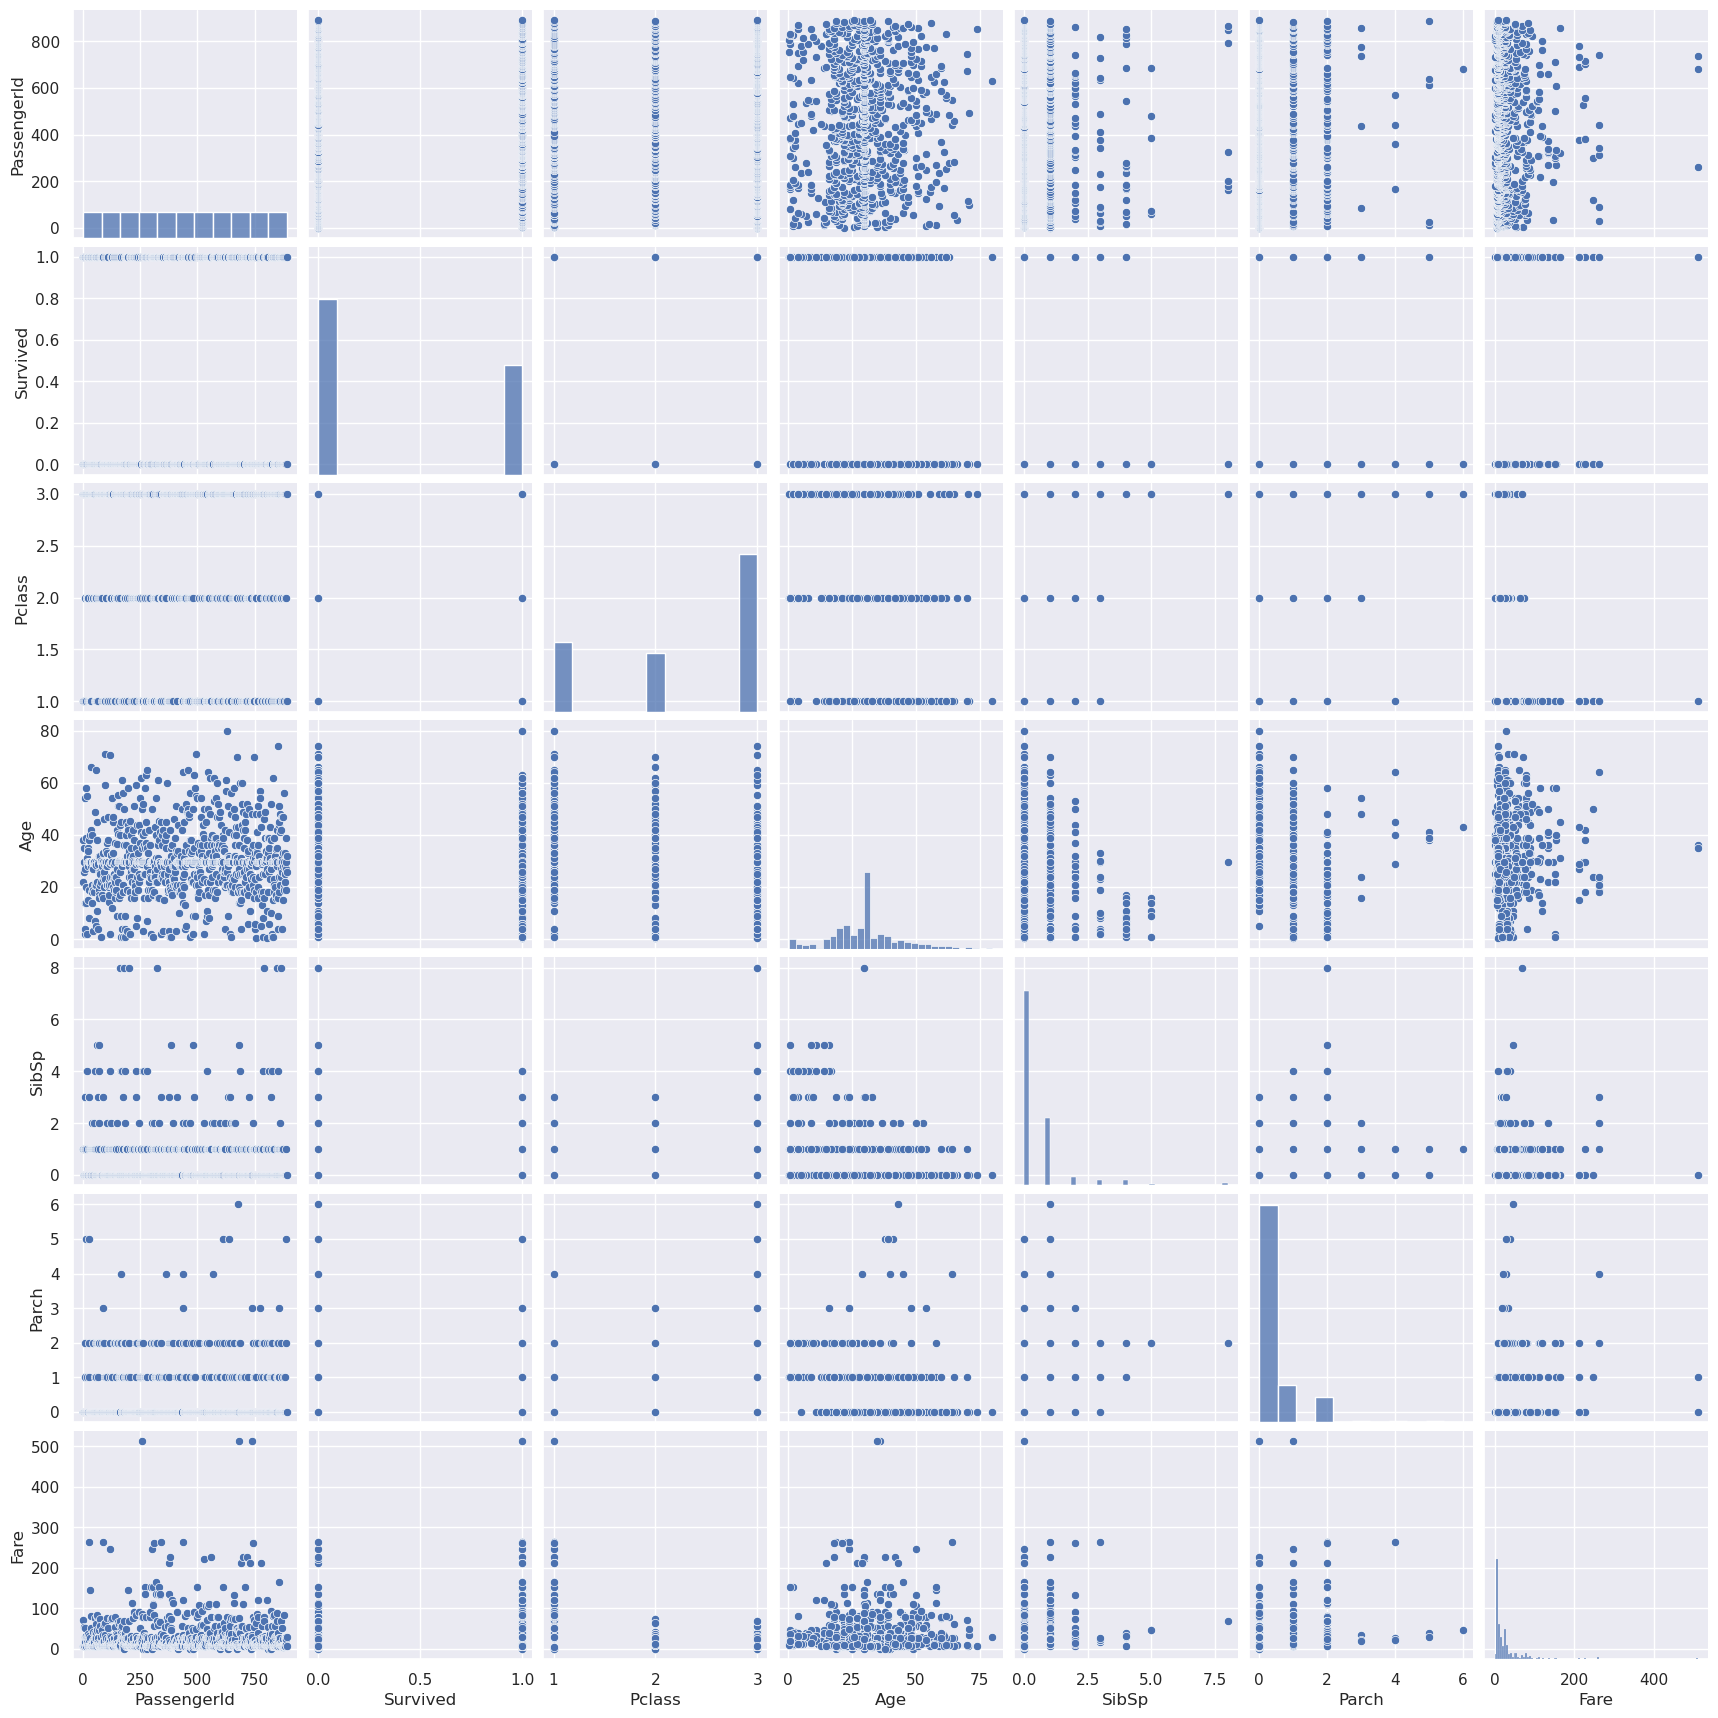

In [85]:
sns.pairplot(df)

<AxesSubplot:>

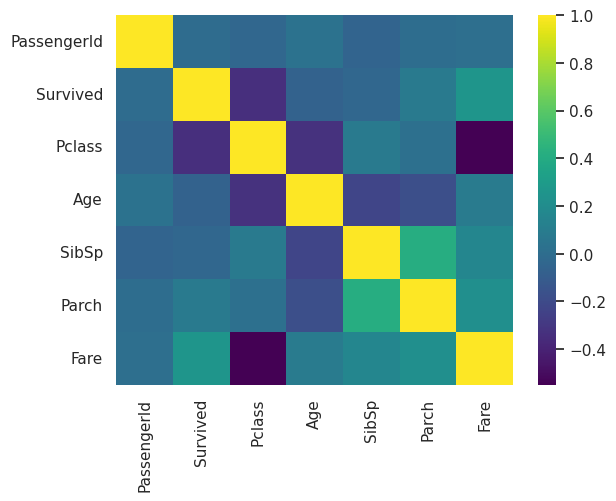

In [90]:
sns.heatmap(df.corr(), cmap='viridis')

In [118]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [119]:
df['Family_size'] = df['SibSp'] + df['Parch']

In [120]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [121]:
def members(x):
    if(x == 0):
        return 'Alone'
    elif(x>=1 and x<=4):
        return 'Middle'
    else:
        return 'Large'

In [123]:
df['Family_type'] = df['Family_size'].apply(members)

In [124]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Family_type
808,809,0,2,"Meyer, Mr. August",male,39.000000,0,0,248723,13.0000,S,0,Alone
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.000000,1,1,364849,15.5000,Q,2,Middle
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,S,0,Alone
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,0,Alone
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.000000,0,0,19972,0.0000,S,0,Alone


In [125]:
df['Family_type'].value_counts()

Alone     537
Middle    307
Large      47
Name: Family_type, dtype: int64

In [128]:
df.drop(['SibSp','Parch','Family_size'], axis=1, inplace=True)

In [129]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,Middle
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,Middle
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,Middle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,Alone


In [130]:
pd.crosstab(df['Family_type'],df['Survived']).apply(lambda x: np.round((x/x.sum())*100,2), axis=1)

Survived,0,1
Family_type,,
Alone,69.65,30.35
Large,85.11,14.89
Middle,43.97,56.03


In [131]:
pd.get_dummies(['Pclass','Sex','Embarked','Family_type'], drop_first=True)

,Family_type,Pclass,Sex
0,0,1,0
1,0,0,1
2,0,0,0
3,1,0,0


![John Wick](outlier.png)

In [132]:
#Handling the outliers in Age Data
df = df[df['Age'] < (df['Age'].mean()+ 3 * df['Age'].std())]

In [133]:
#Handling the data in Fare Data

Q1 = np.percentile(df['Fare'],25)
Q3 = np.percentile(df['Fare'],75)

lower = Q1 - 1.5* (Q3-Q1)
higher = Q1 + 1.5* (Q3-Q1)

df = df[(df['Fare'] > lower) & (df['Fare'] < higher)]

In [134]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,Middle
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,Alone
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,Alone
5,6,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,Q,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,S,Middle


In [136]:
pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','Family_type'], drop_first=True).head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_type_Large,Family_type_Middle
0,1,0,"Braund, Mr. Owen Harris",22.000000,A/5 21171,7.2500,0,1,1,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26.000000,STON/O2. 3101282,7.9250,0,1,0,0,1,0,0
4,5,0,"Allen, Mr. William Henry",35.000000,373450,8.0500,0,1,1,0,1,0,0
5,6,0,"Moran, Mr. James",29.699118,330877,8.4583,0,1,1,1,0,0,0
7,8,0,"Palsson, Master. Gosta Leonard",2.000000,349909,21.0750,0,1,1,0,1,0,1


In [137]:
df = pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','Family_type'], drop_first=True)

In [138]:
df.sample(5)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_type_Large,Family_type_Middle
69,70,0,"Kink, Mr. Vincenz",26.000000,315151,8.6625,0,1,1,0,1,0,1
506,507,1,"Quick, Mrs. Frederick Charles (Jane Richards)",33.000000,26360,26.0000,1,0,0,0,1,0,1
828,829,1,"McCormack, Mr. Thomas Joseph",29.699118,367228,7.7500,0,1,1,1,0,0,0
428,429,0,"Flynn, Mr. James",29.699118,364851,7.7500,0,1,1,1,0,0,0
101,102,0,"Petroff, Mr. Pastcho (""Pentcho"")",29.699118,349215,7.8958,0,1,1,0,1,0,0


# Conclusion

- Survival of Female is more likely than male
- PClass 3 had the highest chance of survival among the three
- People travelling to C had a higher chance of survival 
- People travelling in small familes had higher chance of survival than people travellin alone or in large families
- Age group of people between 20-40 had less surviving chance